# Data Exploration for Traffic Accident Analysis

## Introduction

This notebook focuses on the **data exploration** phase of the Traffic Accident Analysis project. The goal of this phase is to get a deeper understanding of the dataset, its structure, and the key variables. During this step, I will inspect the dataset, check for missing or duplicate values, explore basic statistics, and identify any patterns or trends in the data.

Key objectives:
- Understand the dataset and its features (columns).
- Identify missing or duplicate data and make necessary adjustments.
- Gain insights into the relationships between different variables.
- Visualize trends and patterns to better understad accident data.

The outcome of this notebook will guide the next steps of data cleaning, visualization, and eventually machoine learning.



## Importing libraries and loading the data set

I downloaded the data used for this project from Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download

After storing the dataset locally, I imported necessary libraries and loaded the dataset.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/tuite/Desktop/Software Portfolio/python/Traffic_Accident_Analysis/data/US_Accidents_March23.csv')

# Display the first few rows of the dataset
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## Find basic info on the 

Just from displaying the first 5 rows previously we can already see that this data set has a lot of missing values.

Next I will get more of the basic information, looking out for number of rows and collumns and also the data types.

In [8]:
# Check the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names and data types
df.info()

Dataset contains 7728394 rows and 46 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chi

## Checking the complete dataset for missing values

I need to ensure there are no missing values that will negatively effect my analysis

In [9]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values

End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64

## Result

There is a lot of missing values in this dataset.

I will need to decide if the values are needed for my project, I can either remove them from the dataset or replace the missing values.

## Checking for duplicates

Next i will check for duplicate rows.


In [10]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Result

There was no duplicate rows in this dataset.

## Display summary stats

I want to identify the min, max and mean values while also checking for any anomalies in the dataset

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## basic visualization of Data distributions

using a histogram i want to try and detect any outliers

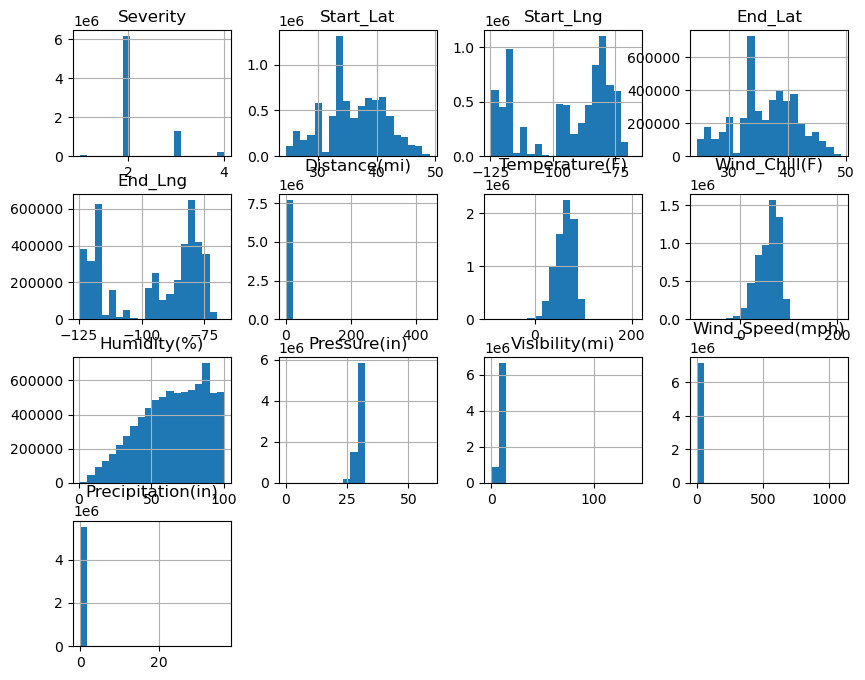

In [12]:

df.hist(figsize=(10, 8), bins=20)
plt.show()


## check for Correlation

check if their is strong relationships between ONLY numerical values.

for example- is accident severity linked to weather?

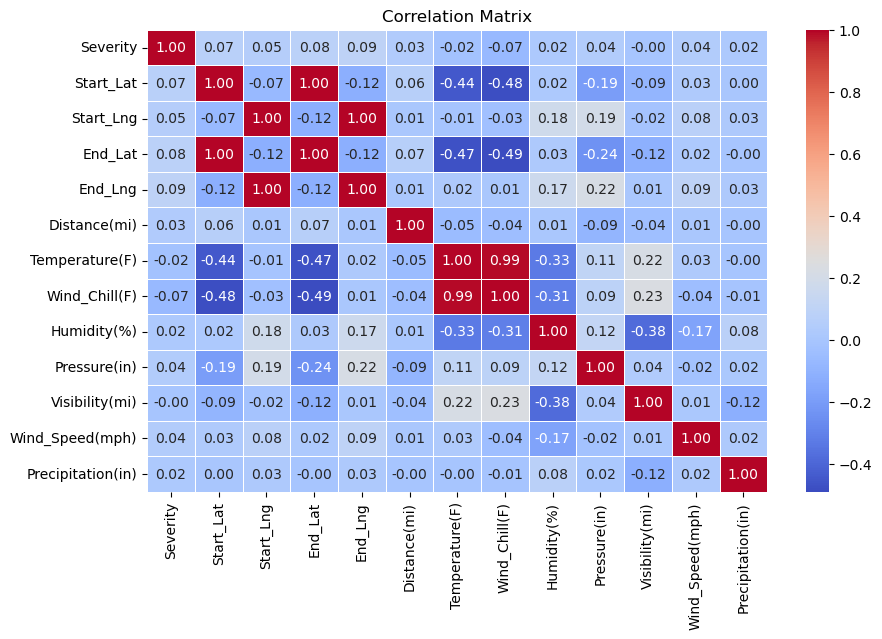

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## conclusion of Data exploration

from looking into my data, I can see that this is a very large dataset and I will need to remove a lot of missing values that arent needed for my project.

No duplicate rows were found in this dataset, correlation suggests that certain factors may impact traffic accidents.

## Next steps

Next, I will clean the dataset by handling missing values, converting data types, and ensuring consistency in categorical variables. This will prepare the data for meaningful visualizations and machine learning modeling."

Below is a better visualization of all of the missing values in this dataset:

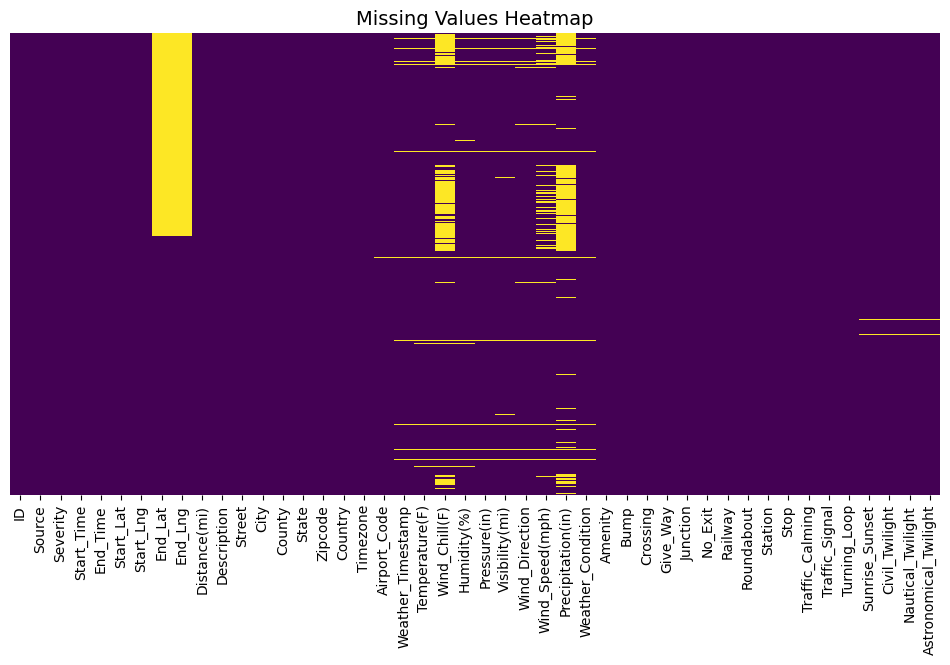

In [16]:
# Setint the figure size
plt.figure(figsize=(12, 6))

# Heatmap of missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Title
plt.title('Missing Values Heatmap', fontsize=14)

# Show plot
plt.show()